In [1]:
import pandas as pd
bCancer = pd.read_csv('project1.csv')

/tmp/ipykernel_34452/3803434255.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
bCancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
bCancer.shape

(386, 10)

In [4]:
bCancer.size

3860

In [5]:
bCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [6]:
#I don't believe any of these variables need datatype conversion. 
#Although there are some categorical variables like breast and breast-quad, 
#these would benefit from one-hot encoding, not datatype conversion. 

In [7]:
bCancer.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
381    False
382    False
383    False
384    False
385    False
Length: 386, dtype: bool

In [8]:
bCancer.duplicated().sum()

11

In [9]:
bCancer = bCancer.drop_duplicates()

In [10]:
bCancer.duplicated().sum()

0

In [11]:
bCancer.isnull().sum()

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [12]:
bCancer[bCancer.isnull().any(axis=1)]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
168,no-recurrence-events,50-59,premeno,NaN,0-2,no,2,right,left_up,no
261,recurrence-events,40-49,ge40,25-29,NaN,yes,3,left,right_low,yes


In [13]:
bCancer['tumor-size'] = bCancer['tumor-size'].fillna(bCancer['tumor-size'].mode()[0])
bCancer['inv-nodes'] = bCancer['inv-nodes'].fillna(bCancer['inv-nodes'].mode()[0])

In [14]:
bCancer[bCancer.isnull().any(axis=1)]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat


In [15]:
bCancer.describe()

,deg-malig
count,375.000000
mean,2.074667
std,0.752730
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


<Axes: xlabel='deg-malig', ylabel='Count'>

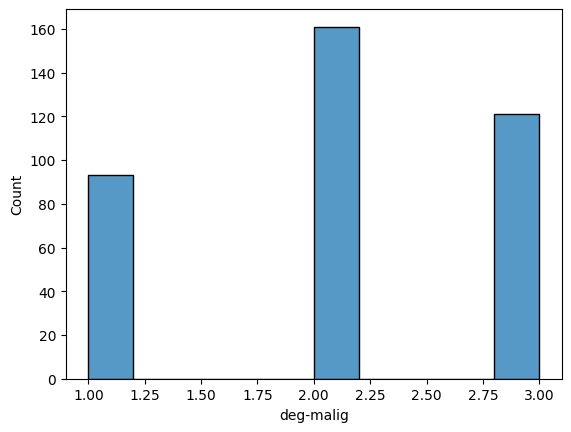

In [16]:
import seaborn as sns
sns.histplot(data=bCancer['deg-malig'] )

<Axes: xlabel='class', ylabel='count'>

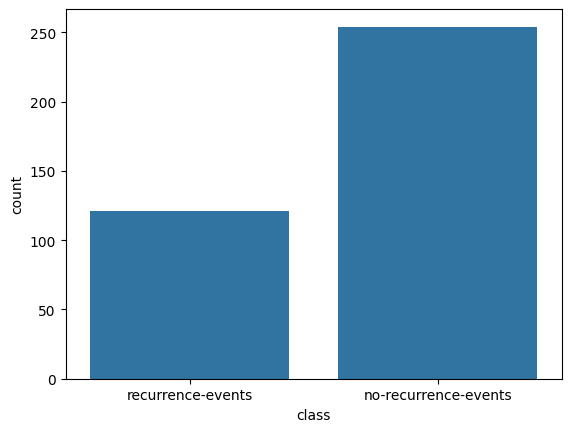

In [17]:
sns.countplot(x=bCancer['class'])

<Axes: xlabel='age', ylabel='count'>

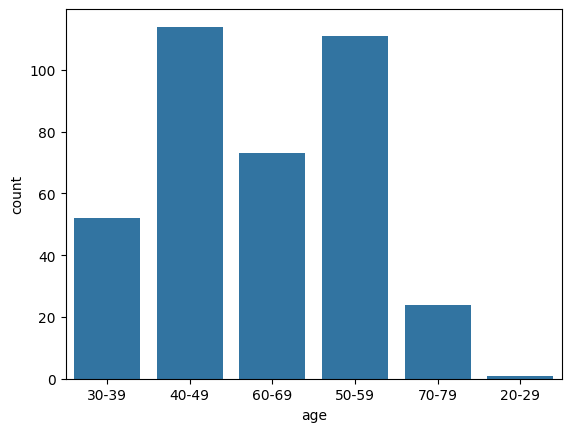

In [18]:
sns.countplot(x=bCancer['age'])

<Axes: xlabel='menopause', ylabel='count'>

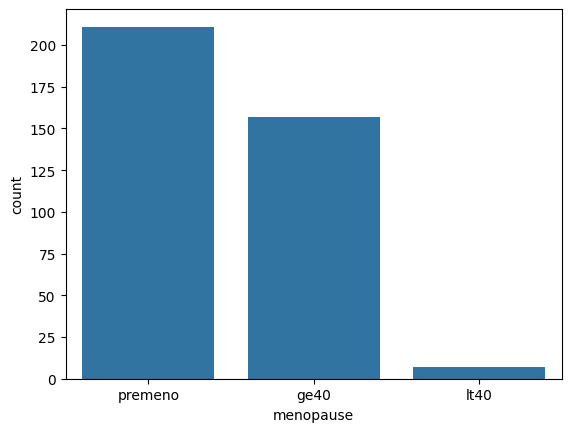

In [19]:
sns.countplot(x=bCancer['menopause'])

<function matplotlib.pyplot.show(close=None, block=None)>

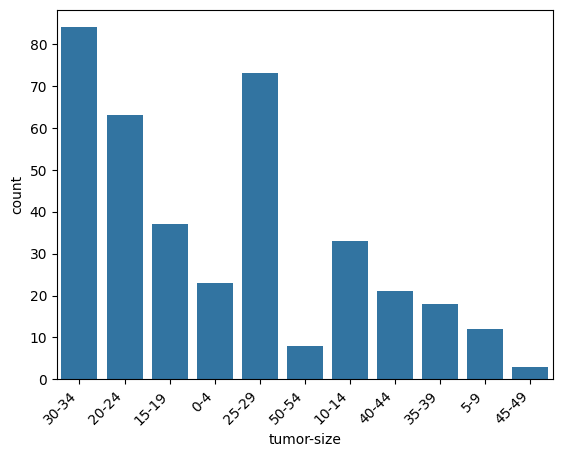

In [20]:
sns.countplot(x=bCancer['tumor-size'])
import matplotlib.pyplot as plt
plt.xticks(rotation=45, ha='right')
plt.show

<Axes: xlabel='inv-nodes', ylabel='count'>

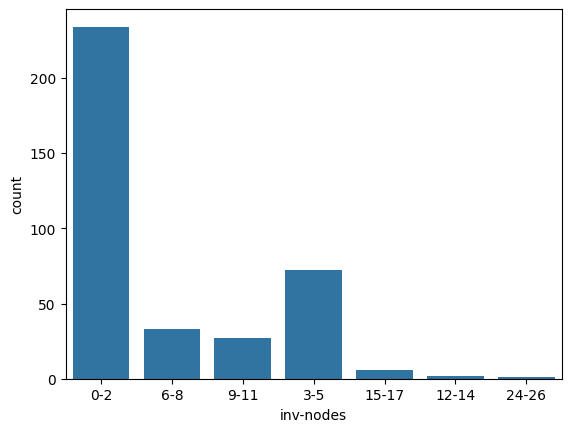

In [21]:
sns.countplot(x=bCancer['inv-nodes'])

<Axes: xlabel='breast', ylabel='count'>

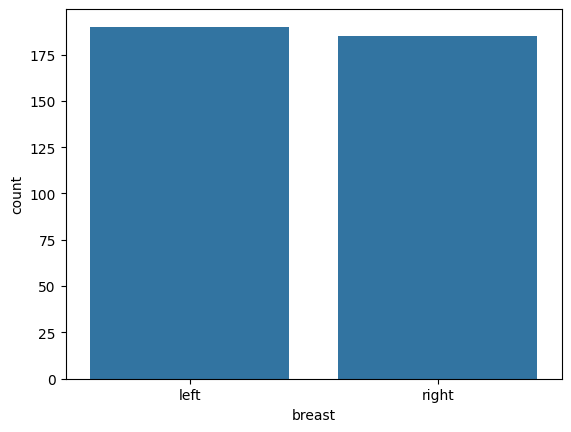

In [22]:
sns.countplot(x=bCancer['breast'])

<Axes: xlabel='breast-quad', ylabel='count'>

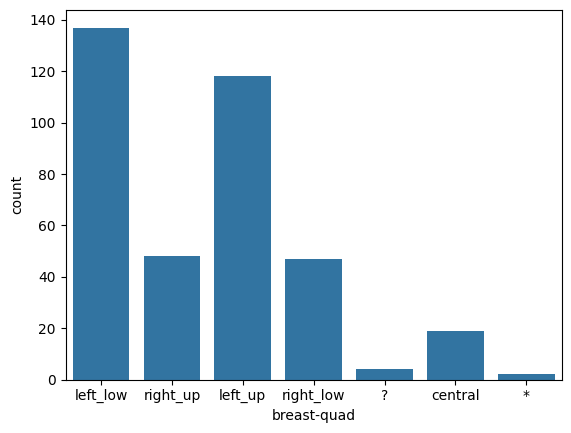

In [23]:
sns.countplot(x=bCancer['breast-quad'])

<Axes: xlabel='irradiat', ylabel='count'>

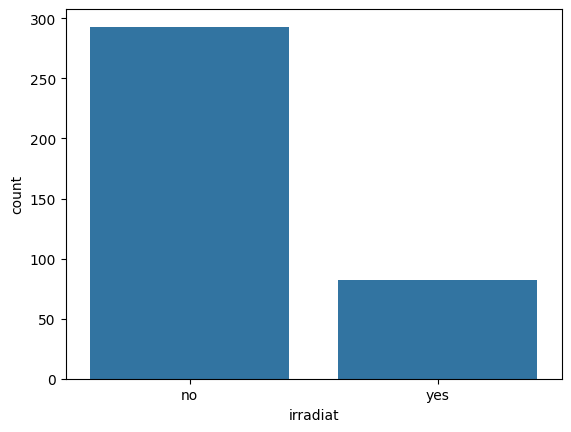

In [24]:
sns.countplot(x=bCancer['irradiat'])

<Axes: xlabel='deg-malig'>

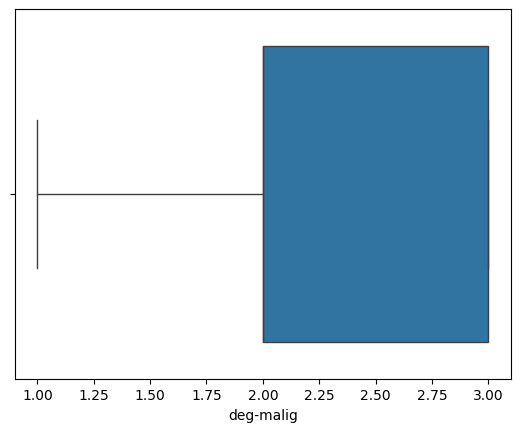

In [25]:
sns.boxplot(data=bCancer, x='deg-malig')

In [26]:
#There seems to be more deg-malig of 2s and 3s than 1s from the histogram. The box plot for deg- malig also seems to be heavily skewed, and 
#this makes sense as there is a higher amount of 2s and 3s than 1s, which would pull the mean and median towards the right. 
#More comments in report

In [27]:
bCancer = pd.get_dummies(bCancer,columns=["class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "breast", "breast-quad", "irradiat"],drop_first=True)
bCancer = bCancer.rename(columns={"class_recurrence-events": "class"})
bCancer

,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,...,node-caps_no,node-caps_yes,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,True,True,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
1,2,False,False,True,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,True,False
2,2,True,False,True,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
3,2,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,2,False,False,True,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,3,False,False,True,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,False,False
382,2,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
383,3,False,False,False,False,False,True,False,True,False,...,True,False,True,False,False,False,False,False,True,False
384,1,False,False,False,False,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True


In [28]:
bCancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   deg-malig              375 non-null    int64
 1   class                  375 non-null    bool 
 2   age_30-39              375 non-null    bool 
 3   age_40-49              375 non-null    bool 
 4   age_50-59              375 non-null    bool 
 5   age_60-69              375 non-null    bool 
 6   age_70-79              375 non-null    bool 
 7   menopause_lt40         375 non-null    bool 
 8   menopause_premeno      375 non-null    bool 
 9   tumor-size_10-14       375 non-null    bool 
 10  tumor-size_15-19       375 non-null    bool 
 11  tumor-size_20-24       375 non-null    bool 
 12  tumor-size_25-29       375 non-null    bool 
 13  tumor-size_30-34       375 non-null    bool 
 14  tumor-size_35-39       375 non-null    bool 
 15  tumor-size_40-44       375 non-null    bool 


In [29]:
from sklearn.model_selection import train_test_split
X = bCancer.drop('class',axis=1)
y = bCancer['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [30]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [31]:
from sklearn.metrics import classification_report
print(f"Performance on TEST for linear classification \n*******************\n{classification_report(y_test, clf.predict(X_test))}")
print(f"Performance on TRAIN for linear classification \n********************\n{classification_report(y_train, clf.predict(X_train))}")

Performance on TEST for linear classification 
*******************
              precision    recall  f1-score   support

       False       0.71      0.84      0.77        77
        True       0.45      0.28      0.34        36

    accuracy                           0.66       113
   macro avg       0.58      0.56      0.56       113
weighted avg       0.63      0.66      0.64       113

Performance on TRAIN for linear classification 
********************
              precision    recall  f1-score   support

       False       0.76      0.87      0.81       177
        True       0.61      0.42      0.50        85

    accuracy                           0.73       262
   macro avg       0.68      0.65      0.66       262
weighted avg       0.71      0.73      0.71       262



In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
print(f"Performance on TEST for knn n = 5\n*******************\n{classification_report(y_test, knn.predict(X_test))}")
print(f"Performance on TRAIN for knn n = 5\n********************\n{classification_report(y_train, knn.predict(X_train))}")

Performance on TEST for knn n = 5
*******************
              precision    recall  f1-score   support

       False       0.67      0.82      0.74        77
        True       0.26      0.14      0.18        36

    accuracy                           0.60       113
   macro avg       0.47      0.48      0.46       113
weighted avg       0.54      0.60      0.56       113

Performance on TRAIN for knn n = 5
********************
              precision    recall  f1-score   support

       False       0.75      0.88      0.81       177
        True       0.60      0.38      0.46        85

    accuracy                           0.72       262
   macro avg       0.68      0.63      0.64       262
weighted avg       0.70      0.72      0.70       262



In [34]:
import numpy as np
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}
from sklearn.model_selection import GridSearchCV
#optimize recall to minimize false negatives
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5, scoring="recall")
knn_gscv.fit(X_train, y_train)
best_knn = knn_gscv.best_estimator_

In [35]:
print(f"Performance on TEST for best knn\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")
print(f"Performance on TRAIN for best knn\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")

Performance on TEST for best knn
*******************
              precision    recall  f1-score   support

       False       0.68      0.68      0.68        77
        True       0.32      0.33      0.33        36

    accuracy                           0.57       113
   macro avg       0.50      0.50      0.50       113
weighted avg       0.57      0.57      0.57       113

Performance on TRAIN for best knn
********************
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       177
        True       0.97      0.99      0.98        85

    accuracy                           0.98       262
   macro avg       0.98      0.99      0.98       262
weighted avg       0.98      0.98      0.98       262



In [36]:
#I believe recall is most important for this problem (explained further in report)